In [1]:
#Class para dar forma a los print
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
#Librerias a utilizar
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
student_data = pd.read_csv('student-data.csv')

FileNotFoundError: [Errno 2] File student-data.csv does not exist: 'student-data.csv'

In [7]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [8]:
#Valores únicos de las variables tipo object
print(color.BOLD + '  school' + color.END)
print(student_data['school'].value_counts())
print(color.BOLD + '\n  sex' + color.END)
print(student_data['sex'].value_counts())
print(color.BOLD + '\n  address' + color.END)
print(student_data['address'].value_counts())
print(color.BOLD + '\n  famsize' + color.END)
print(student_data['famsize'].value_counts())
print(color.BOLD + '\n  Pstatus' + color.END)
print(student_data['Pstatus'].value_counts())
print(color.BOLD + '  Mjob' + color.END)
print(student_data['Mjob'].value_counts())
print(color.BOLD + '\n  Fjob' + color.END)
print(student_data['Fjob'].value_counts())
print(color.BOLD + '\n  reason  ' + color.END)
print(student_data['reason'].value_counts())
print(color.BOLD + '\n  guardian' + color.END)
print(student_data['guardian'].value_counts())
print(color.BOLD + '\n  schoolsup' + color.END)
print(student_data['schoolsup'].value_counts())
print(color.BOLD + '\n  famsup' + color.END)
print(student_data['famsup'].value_counts())
print(color.BOLD + '\n  paid' + color.END)
print(student_data['paid'].value_counts())
print(color.BOLD + '\n  activities' + color.END)
print(student_data['activities'].value_counts())
print(color.BOLD + '\n  nursery' + color.END)
print(student_data['nursery'].value_counts())
print(color.BOLD + '\n  higher' + color.END)
print(student_data['higher'].value_counts())
print(color.BOLD + '\n  internet' + color.END)
print(student_data['internet'].value_counts())
print(color.BOLD + '\n  romantic' + color.END)
print(student_data['romantic'].value_counts())

  school
GP    349
MS     46
Name: school, dtype: int64

  sex
F    208
M    187
Name: sex, dtype: int64

  address
U    307
R     88
Name: address, dtype: int64

  famsize
GT3    281
LE3    114
Name: famsize, dtype: int64

  Pstatus
T    354
A     41
Name: Pstatus, dtype: int64
  Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

  Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

  reason  
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

  guardian
mother    273
father     90
other      32
Name: guardian, dtype: int64

  schoolsup
no     344
yes     51
Name: schoolsup, dtype: int64

  famsup
yes    242
no     153
Name: famsup, dtype: int64

  paid
no     214
yes    181
Name: paid, dtype: int64

  activities
yes    201
no     194
Name: activities, dtype: int64

  nursery
yes    314
no      81
Name: nursery, dtype: 

## Preparación de los Datos
Se realizan transformaciones y adecuación al conjunto de datos, para garantizar su óptimo estado una vez sea entregado al área de modelamiento

In [9]:
correlation= student_data.corr()
correlation.style.background_gradient(cmap='coolwarm')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908


In [10]:
student_data = student_data.drop(['school','address','Pstatus','Fedu','Mjob','Fjob','reason','guardian','failures','nursery','famrel','Dalc'],axis=1)

In [11]:
student_data.head()

,sex,age,famsize,Medu,traveltime,studytime,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,Walc,health,absences,passed
0,F,18,GT3,4,2,2,yes,no,no,no,yes,no,no,3,4,1,3,6,no
1,F,17,GT3,1,1,2,no,yes,no,no,yes,yes,no,3,3,1,3,4,no
2,F,15,LE3,1,1,2,yes,no,yes,no,yes,yes,no,3,2,3,3,10,yes
3,F,15,GT3,4,1,3,no,yes,yes,yes,yes,yes,yes,2,2,1,5,2,yes
4,F,16,GT3,3,1,2,no,yes,yes,no,yes,no,no,3,2,2,5,4,yes


In [12]:
print (color.BOLD + "\nTipos de variables:\n" + color.END)
print (student_data.dtypes)


Tipos de variables:

sex           object
age            int64
famsize       object
Medu           int64
traveltime     int64
studytime      int64
schoolsup     object
famsup        object
paid          object
activities    object
higher        object
internet      object
romantic      object
freetime       int64
goout          int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object


In [13]:
student_data.describe()

,age,Medu,traveltime,studytime,freetime,goout,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,1.448101,2.035443,3.235443,3.108861,2.291139,3.554430,5.708861
std,1.276043,1.094735,0.697505,0.839240,0.998862,1.113278,1.287897,1.390303,8.003096
min,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,2.000000,2.000000,4.000000,4.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,75.000000


### Detección de posible Outliers

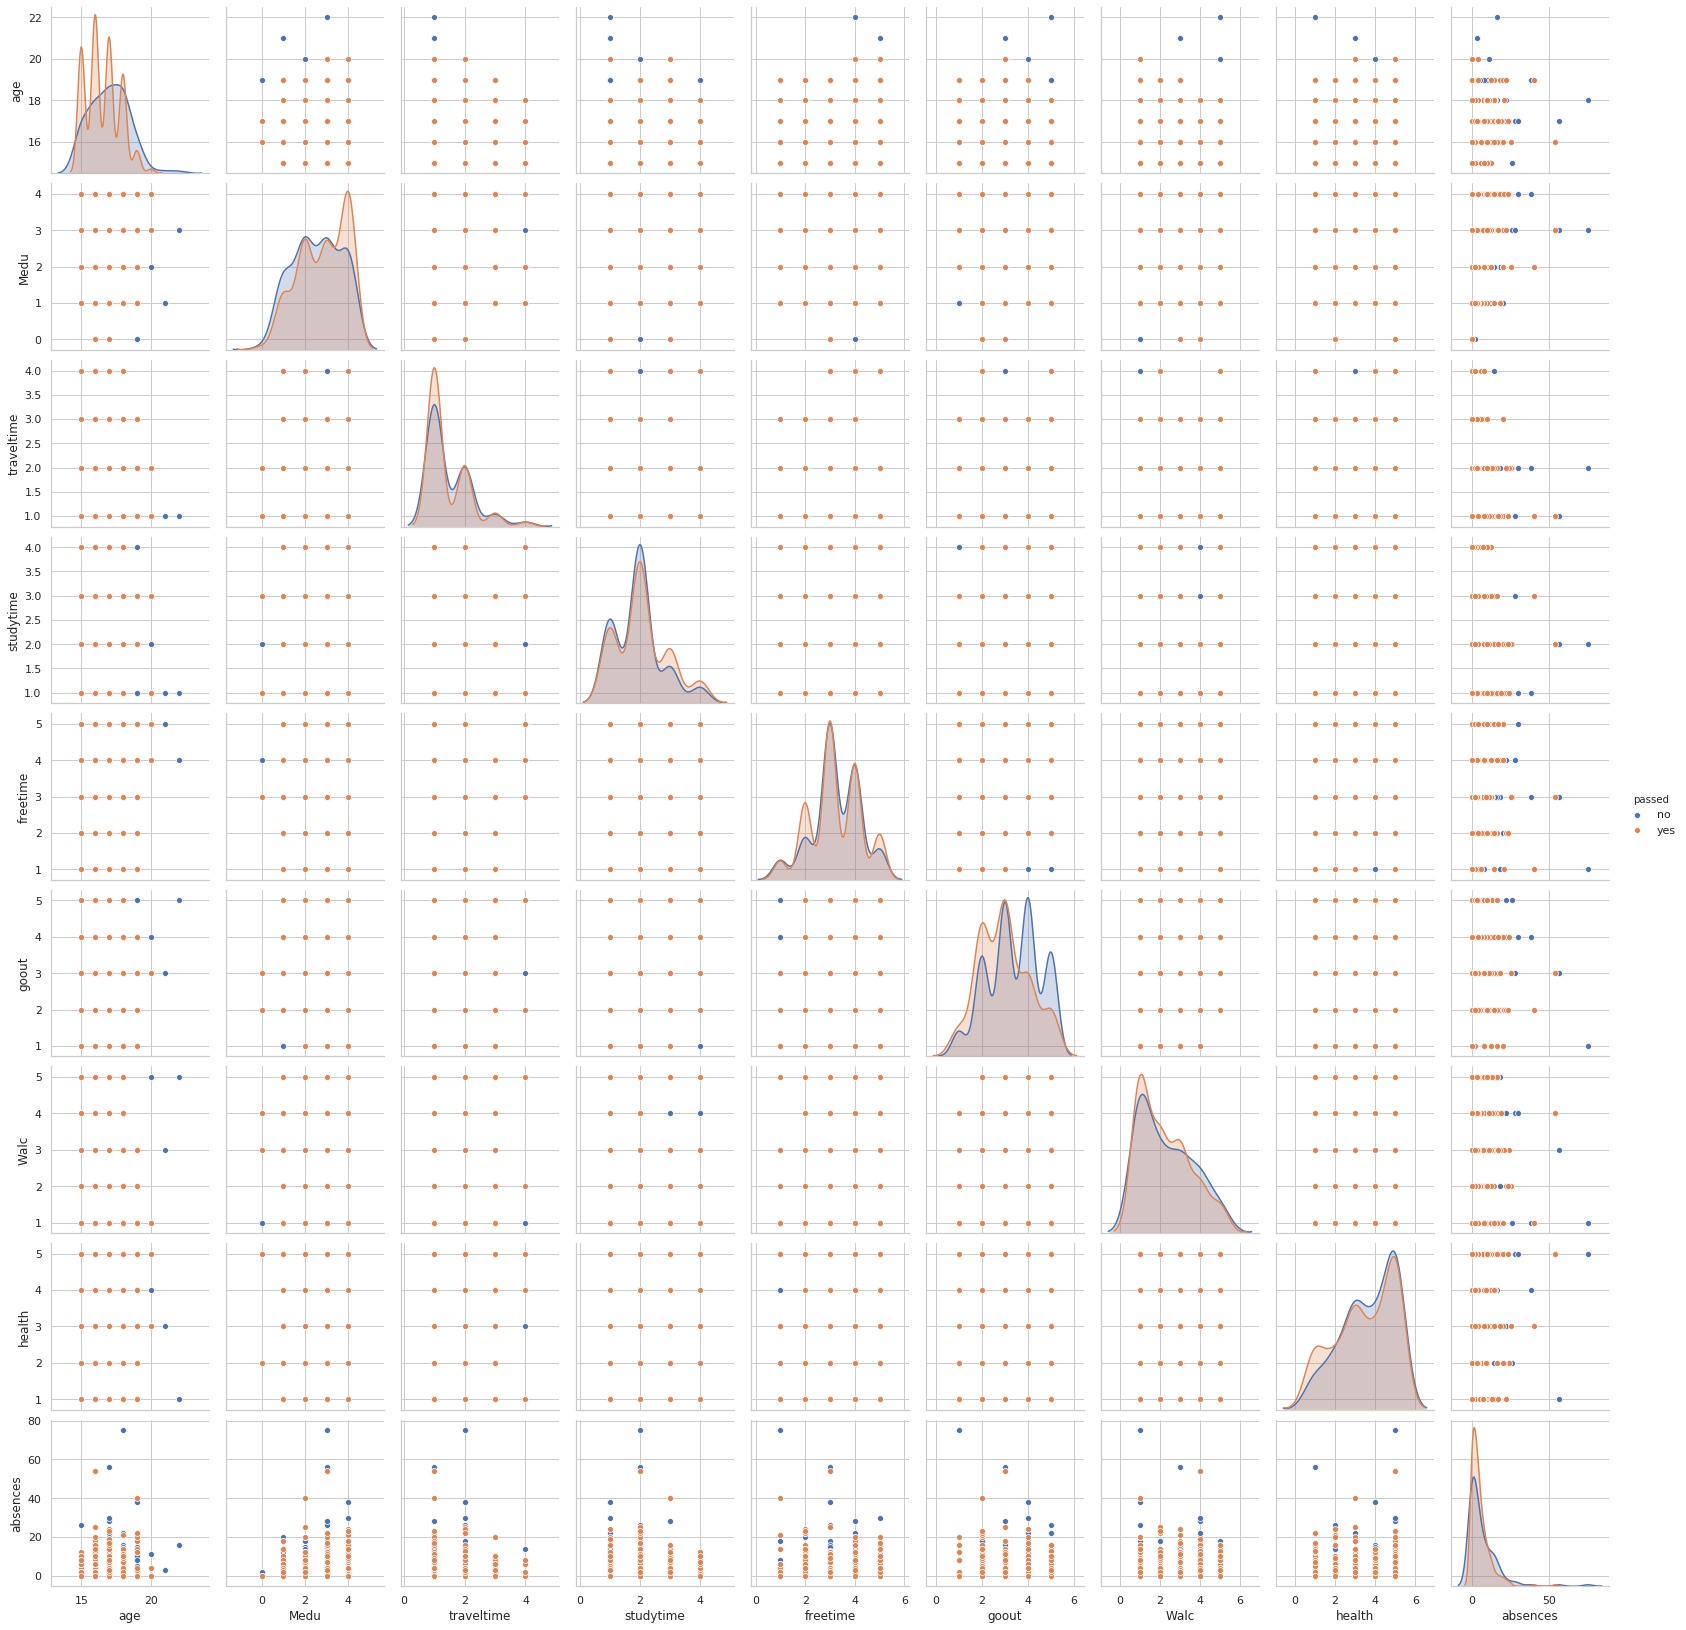

In [14]:
sns.set(style="whitegrid")
sns.pairplot(student_data, hue = 'passed')

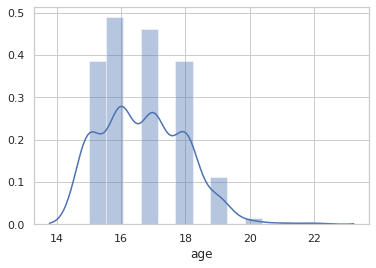

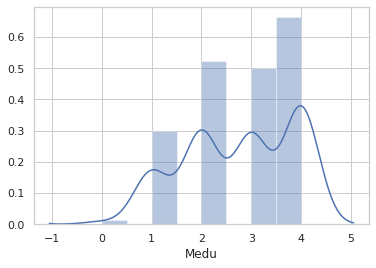

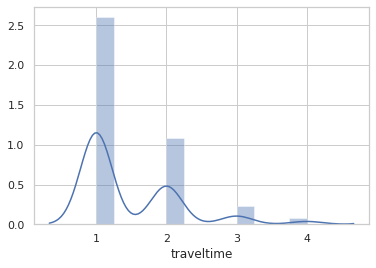

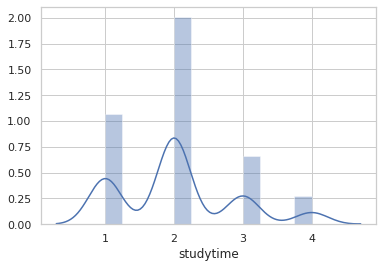

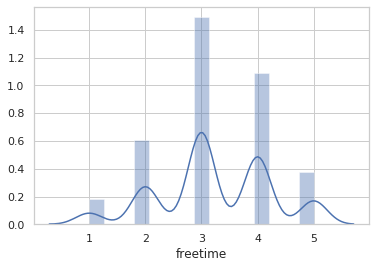

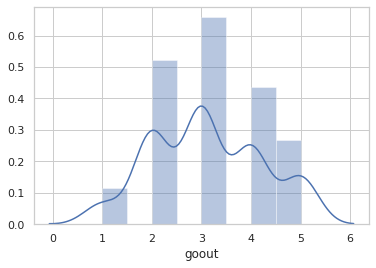

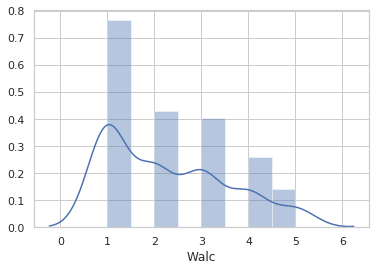

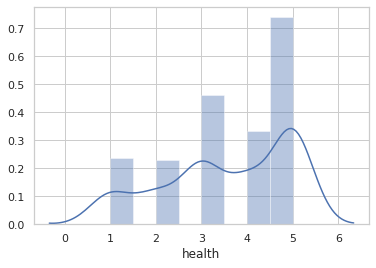

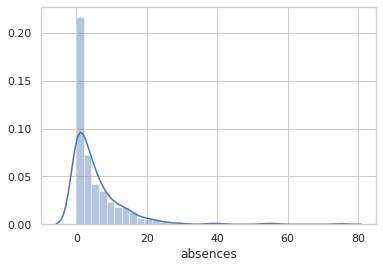

In [15]:
import matplotlib.pyplot as plt
sns.distplot(student_data.age)
plt.show()
print('\n')
sns.distplot(student_data.Medu)
plt.show()
print('\n')
sns.distplot(student_data.traveltime)
plt.show()
print('\n')
sns.distplot(student_data.studytime)
plt.show()
print('\n')
sns.distplot(student_data.freetime)
plt.show()
print('\n')
sns.distplot(student_data.goout)
plt.show()
sns.distplot(student_data.Walc)
plt.show()
print('\n')
sns.distplot(student_data.health)
plt.show()
print('\n')
sns.distplot(student_data.absences)
plt.show()

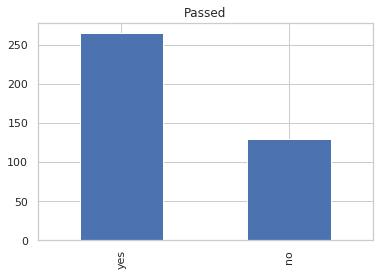

In [16]:
plot = student_data['passed'].value_counts().plot(kind='bar',
                                            title='Passed')

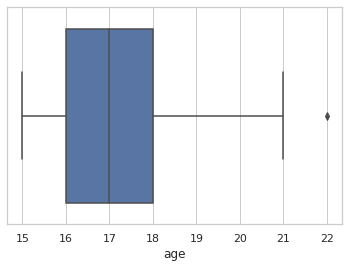

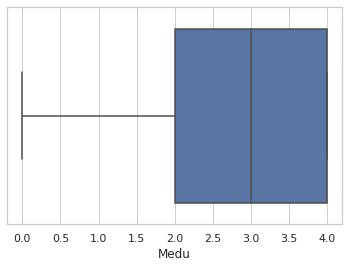

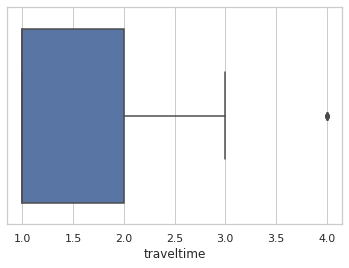

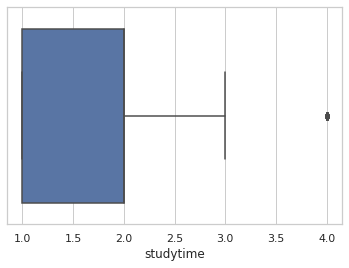

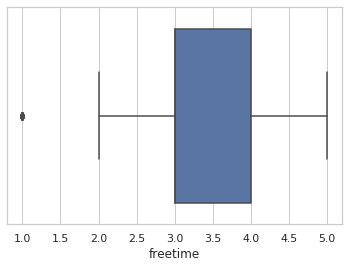

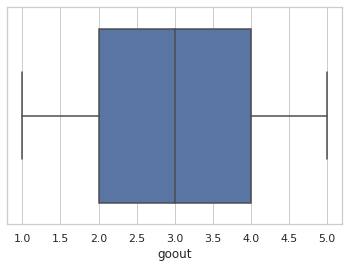

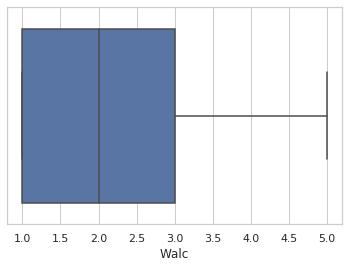

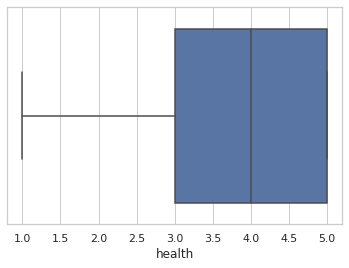

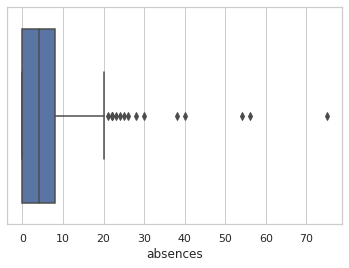

In [17]:
sns.boxplot(student_data.age)
plt.show()
print('\n')
sns.boxplot(student_data.Medu)
plt.show()
print('\n')
sns.boxplot(student_data.traveltime)
plt.show()
print('\n')
sns.boxplot(student_data.studytime)
plt.show()
print('\n')
sns.boxplot(student_data.freetime)
plt.show()
print('\n')
sns.boxplot(student_data.goout)
plt.show()
sns.boxplot(student_data.Walc)
plt.show()
print('\n')
sns.boxplot(student_data.health)
plt.show()
print('\n')
sns.boxplot(student_data.absences)
plt.show()

In [18]:
#Age
valor_medio = student_data.age.mean()
std = student_data.age.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_age = student_data["age"].between(minimo, maximo, inclusive = True) 
student_data_no_outliers = student_data[mascara_outliers_age]

In [19]:
print(maximo)

20.52433070546244


In [20]:
#Traveltime
valor_medio = student_data.traveltime.mean()
std = student_data.traveltime.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_traveltime = student_data["traveltime"].between(minimo, maximo, inclusive = True) 
student_data_no_outliers = student_data_no_outliers[mascara_outliers_traveltime]

In [21]:
#Studytime
valor_medio = student_data.studytime.mean()
std = student_data.studytime.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_studytime = student_data["studytime"].between(minimo, maximo, inclusive = True) 
student_data_no_outliers = student_data_no_outliers[mascara_outliers_studytime]

In [22]:
#Freetime
valor_medio = student_data.freetime.mean()
std = student_data.freetime.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_freetime = student_data["freetime"].between(minimo, maximo, inclusive = True) 
student_data_no_outliers = student_data_no_outliers[mascara_outliers_freetime]

In [23]:
#Absences
valor_medio = student_data.absences.mean()
std = student_data.absences.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_absences = student_data["absences"].between(minimo, maximo, inclusive = True) 
student_data_no_outliers = student_data_no_outliers[mascara_outliers_absences]

In [24]:
student_data_no_outliers.describe()

,age,Medu,traveltime,studytime,freetime,goout,Walc,health,absences
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,16.662269,2.762533,1.395778,2.044855,3.229551,3.089710,2.242744,3.548813,5.031662
std,1.226656,1.094271,0.601218,0.836087,0.988062,1.099483,1.246866,1.385724,5.702413
min,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,2.000000,2.000000,4.000000,4.000000,3.000000,5.000000,8.000000
max,20.000000,4.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,28.000000


### Paso de variables categóricas a numéricas

In [25]:
le = preprocessing.LabelEncoder()
#Variable Sex de categórica a numérica
le.fit(student_data_no_outliers.sex)
student_data_dummie_sex = le.transform(student_data_no_outliers.sex)
trans= list(le.inverse_transform([0,1]))
student_data_dummie_sex = pd.DataFrame(data=student_data_dummie_sex,columns=["Sex"])
print("Transformación hecha variable: Sex")
print("0 - ",trans[0])
print("1 - ",trans[1])

#Variable famsize de categórica a numérica
le.fit(student_data_no_outliers.famsize)
student_data_dummie_famsize = le.transform(student_data_no_outliers.famsize)
trans= list(le.inverse_transform([0,1]))
student_data_dummie_famsize = pd.DataFrame(data=student_data_dummie_famsize,columns=["Famsize"])
print("Transformación hecha variable: Famsize")
print("0 - ",trans[0])
print("1 - ",trans[1])

#Variable schoolsup de categórica a numérica
le.fit(student_data_no_outliers.schoolsup)
student_data_dummie_schoolsup = le.transform(student_data_no_outliers.schoolsup)
trans= list(le.inverse_transform([0,1]))
student_data_dummie_schoolsup = pd.DataFrame(data=student_data_dummie_schoolsup,columns=["Schoolsup"])
print("Transformación hecha variable: Schoolsup")
print("0 - ",trans[0])
print("1 - ",trans[1])

#Variable famsup de categórica a numérica
le.fit(student_data_no_outliers.famsup)
student_data_dummie_famsup = le.transform(student_data_no_outliers.famsup)
trans= list(le.inverse_transform([0,1]))
student_data_dummie_famsup = pd.DataFrame(data=student_data_dummie_famsup,columns=["Famsup"])
print("Transformación hecha variable: Famsup")
print("0 - ",trans[0])
print("1 - ",trans[1])

#Variable paid de categórica a numérica
le.fit(student_data_no_outliers.paid)
student_data_dummie_paid = le.transform(student_data_no_outliers.paid)
trans= list(le.inverse_transform([0,1]))
student_data_dummie_paid = pd.DataFrame(data=student_data_dummie_paid,columns=["Paid"])
print("Transformación hecha variable: Paid")
print("0 - ",trans[0])
print("1 - ",trans[1])

#Variable activities de categórica a numérica
le.fit(student_data_no_outliers.activities)
student_data_dummie_activities = le.transform(student_data_no_outliers.activities)
trans= list(le.inverse_transform([0,1]))
student_data_dummie_activities = pd.DataFrame(data=student_data_dummie_activities,columns=["Activities"])
print("Transformación hecha variable: Activities")
print("0 - ",trans[0])
print("1 - ",trans[1])

#Variable higher de categórica a numérica
le.fit(student_data_no_outliers.higher)
student_data_dummie_higher = le.transform(student_data_no_outliers.higher)
trans= list(le.inverse_transform([0,1]))
student_data_dummie_higher = pd.DataFrame(data=student_data_dummie_higher,columns=["Highger"])
print("Transformación hecha variable: Higher")
print("0 - ",trans[0])
print("1 - ",trans[1])

#Variable internet de categórica a numérica
le.fit(student_data_no_outliers.internet)
student_data_dummie_internet = le.transform(student_data_no_outliers.internet)
trans= list(le.inverse_transform([0,1]))
student_data_dummie_internet = pd.DataFrame(data=student_data_dummie_internet,columns=["Internet"])
print("Transformación hecha variable: Internet")
print("0 - ",trans[0])
print("1 - ",trans[1])

#Variable romantic de categórica a numérica
le.fit(student_data_no_outliers.romantic)
student_data_dummie_romantic = le.transform(student_data_no_outliers.romantic)
trans= list(le.inverse_transform([0,1]))
student_data_dummie_romantic = pd.DataFrame(data=student_data_dummie_romantic,columns=["Romantic"])
print("Transformación hecha variable: Romantic")
print("0 - ",trans[0])
print("1 - ",trans[1])

#Variable passed (objetivo) de categórica a numérica
le.fit(student_data_no_outliers.passed)
student_data_dummie_passed = le.transform(student_data_no_outliers.passed)
trans= list(le.inverse_transform([0,1]))
student_data_dummie_passed = pd.DataFrame(data=student_data_dummie_passed,columns=["Passed"])
print("Transformación hecha variable: Passed")
print("0 - ",trans[0])
print("1 - ",trans[1])

Transformación hecha variable: Sex
0 -  F
1 -  M
Transformación hecha variable: Famsize
0 -  GT3
1 -  LE3
Transformación hecha variable: Schoolsup
0 -  no
1 -  yes
Transformación hecha variable: Famsup
0 -  no
1 -  yes
Transformación hecha variable: Paid
0 -  no
1 -  yes
Transformación hecha variable: Activities
0 -  no
1 -  yes
Transformación hecha variable: Higher
0 -  no
1 -  yes
Transformación hecha variable: Internet
0 -  no
1 -  yes
Transformación hecha variable: Romantic
0 -  no
1 -  yes
Transformación hecha variable: Passed
0 -  no
1 -  yes


In [26]:
student_data_dummies = student_data_no_outliers.drop(['sex','famsize','schoolsup','famsup','paid','activities','higher','internet','romantic','passed'],axis = 1)

In [27]:
student_data_dummies.reset_index(drop=True, inplace=True)
student_data_dummie_sex.reset_index(drop=True, inplace=True)
student_data_dummie_famsize.reset_index(drop=True, inplace=True)
student_data_dummie_schoolsup.reset_index(drop=True, inplace=True)
student_data_dummie_famsup.reset_index(drop=True, inplace=True)
student_data_dummie_paid.reset_index(drop=True, inplace=True)
student_data_dummie_activities.reset_index(drop=True, inplace=True)
student_data_dummie_higher.reset_index(drop=True, inplace=True)
student_data_dummie_internet.reset_index(drop=True, inplace=True)
student_data_dummie_romantic.reset_index(drop=True, inplace=True)
student_data_dummie_passed.reset_index(drop=True, inplace=True)

In [28]:
student_data_final = pd.concat([student_data_dummies,student_data_dummie_sex,student_data_dummie_famsize,student_data_dummie_schoolsup,student_data_dummie_famsup,student_data_dummie_paid,student_data_dummie_activities,student_data_dummie_higher,student_data_dummie_internet,student_data_dummie_romantic,student_data_dummie_passed],axis='columns')

In [29]:
print (color.BOLD + "\nTipos de variables:\n" + color.END)
print (student_data_final.dtypes)


Tipos de variables:

age           int64
Medu          int64
traveltime    int64
studytime     int64
freetime      int64
goout         int64
Walc          int64
health        int64
absences      int64
Sex           int64
Famsize       int64
Schoolsup     int64
Famsup        int64
Paid          int64
Activities    int64
Highger       int64
Internet      int64
Romantic      int64
Passed        int64
dtype: object


In [30]:
student_data_final.head()

,age,Medu,traveltime,studytime,freetime,goout,Walc,health,absences,Sex,Famsize,Schoolsup,Famsup,Paid,Activities,Highger,Internet,Romantic,Passed
0,18,4,2,2,3,4,1,3,6,0,0,1,0,0,0,1,0,0,0
1,17,1,1,2,3,3,1,3,4,0,0,0,1,0,0,1,1,0,0
2,15,1,1,2,3,2,3,3,10,0,1,1,0,1,0,1,1,0,1
3,15,4,1,3,2,2,1,5,2,0,0,0,1,1,1,1,1,1,1
4,16,3,1,2,3,2,2,5,4,0,0,0,1,1,0,1,0,0,1


In [31]:
student_data_final.shape

(379, 19)

## Proceso de Entrenamiento Modelo XGBoost

In [32]:
#se organiza el datased para entrenar modelo XGBoost . la primera columna debe ser el target
dataset = pd.concat([student_data_final['Passed'], student_data_final.drop(['Passed'], axis=1)], axis=1)
dataset.head(5)

,Passed,age,Medu,traveltime,studytime,freetime,goout,Walc,health,absences,Sex,Famsize,Schoolsup,Famsup,Paid,Activities,Highger,Internet,Romantic
0,0,18,4,2,2,3,4,1,3,6,0,0,1,0,0,0,1,0,0
1,0,17,1,1,2,3,3,1,3,4,0,0,0,1,0,0,1,1,0
2,1,15,1,1,2,3,2,3,3,10,0,1,1,0,1,0,1,1,0
3,1,15,4,1,3,2,2,1,5,2,0,0,0,1,1,1,1,1,1
4,1,16,3,1,2,3,2,2,5,4,0,0,0,1,1,0,1,0,0


In [33]:
# importacion Librerias necesarias para crear y entrenar modelo
import boto3
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sagemaker
from sagemaker import get_execution_role,
from sagemaker.predictor import csv_serializer 

# Define IAM role
role = sagemaker.get_execution_role()
#Tambien se puede indicar un nombre especifico
#bucket='modelo-desercion'
bucket = sagemaker.Session().default_bucket()
prefix = 'sagemak/xgboost_student_desercion'
region = boto3.Session().region_name

In [34]:
#el XGBoost DEBE recibir un csv sin encabesado ni indices con la primera columna siendo el target (Passed)
train_data, validation_data, test_data = np.split(dataset.sample(frac=1, random_state=1729), [int(0.7 * len(dataset)), int(0.9 * len(dataset))])
train_data.to_csv('train.csv', header=False, index=False)
validation_data.to_csv('validation.csv', header=False, index=False)

In [35]:
#estos serán los datos para validar las prediciones del modelo:
validation_data

,Passed,age,Medu,traveltime,studytime,freetime,goout,Walc,health,absences,Sex,Famsize,Schoolsup,Famsup,Paid,Activities,Highger,Internet,Romantic
356,0,19,3,2,2,2,2,1,3,4,0,1,0,0,0,1,1,0,1
101,0,15,3,2,2,3,5,1,2,26,0,0,1,1,1,0,1,1,0
133,0,16,3,2,1,3,2,1,5,0,0,0,0,1,0,1,1,1,1
112,1,16,4,1,2,4,4,2,5,2,1,0,0,1,0,1,1,1,0
299,1,19,2,3,2,4,1,1,2,20,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,1,17,4,1,1,2,1,2,3,12,0,1,0,1,1,0,1,0,0
7,0,17,4,2,2,1,4,1,1,6,0,0,1,1,0,0,1,0,0
357,1,18,1,3,1,3,3,3,3,3,1,1,0,1,1,1,0,1,1
269,1,18,4,2,1,2,3,2,1,8,1,1,0,0,1,1,1,1,0


In [36]:
#Cargamos nuestro dataset DE ENTRENAMIENTO Y VALIDACION a S3  IMPORTANTE ANTES DE GENERAR LOS S3_IMPUT desden estar en el bucket

s3_upload_train = boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')
s3_upload_validation = boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation/validation.csv')).upload_file('validation.csv')

In [39]:
from sagemaker.session import s3_input

In [41]:
#Creamos dataset de entrenamiento y validacion
s3_input_train=s3_input(s3_data='s3://{}/{}/train'.format(bucket, prefix), content_type='csv')
s3_input_validation =s3_input(s3_data='s3://{}/{}/validation'.format(bucket, prefix), content_type='csv')

The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [43]:
print(s3_input_validation)

<sagemaker.deprecations.deprecated_class.<locals>.DeprecatedClass object at 0x7fe1874d37f0>


In [44]:
#Definimos containers dependiendo de la region
containers = {'us-west-2': '433757028032.dkr.ecr.us-west-2.amazonaws.com/xgboost:latest',
              'us-east-1': '811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:latest',
              'us-east-2': '825641698319.dkr.ecr.us-east-2.amazonaws.com/xgboost:latest',
              'eu-west-1': '685385470294.dkr.ecr.eu-west-1.amazonaws.com/xgboost:latest'}

#Se obtiene la session
sess = sagemaker.Session()

#Estimadores para el modelo
xgb = sagemaker.estimator.Estimator(containers[boto3.Session().region_name],
                                    role=role, 
                                    train_instance_count=1, 
                                    train_instance_type='ml.m4.xlarge',
                                    
                                    output_path='s3://{}/{}/output'.format(bucket, prefix),
                                    sagemaker_session=sess)

#se define el objetivo en este caso logisitc
xgb.set_hyperparameters(eta=0.1,
                        objective='binary:logistic',
                        num_round=25)




train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [5]:
#Entrenando el modelo
xgb.fit({"train": s3_input_train, "validation": s3_input_validation})

NameError: name 'xgb' is not defined

In [ ]:
#Creamos el ENDPOINT Para consumir el modelo
xgb_predictor = xgb.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge') #ml.m4.xlarge tiene mayor capacidad en produccion

-------------------!

In [1]:
"""este es el enpoint creado, Se puede visualizar en la consola de sagemaker (considerar apagarlos mientras no se use para
limitar costos
"""
xgb_predictor.endpoint

NameError: name 'xgb_predictor' is not defined

In [51]:
#se le expecifican algunos parametros al predictor
xgb_predictor.content_type = 'text/csv'
xgb_predictor.serializer = csv_serializer
xgb_predictor.deserializer = None

#funcion que recibe un array y va pasando cada filas al predictor
#Devuelbe un array con las predicciones
def predict(data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, xgb_predictor.predict(array).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')

predictions = predict(test_data.to_numpy()[:, 1:])
predictions

AttributeError: can't set attribute

In [ ]:
#En el caso que se quiera redondear las salidas de prediccion a 0 O 1
predictions = np.round(predict(test_data.to_numpy()[:, 1:]))
predictions

### Presición modelo de test creado


In [ ]:
#En este paso, evaluará el rendimiento y la precisión del modelo de aprendizaje automático.

#para comparar los valores reales con los valores predichos en una tabla denominada matriz de confusión.

cm = pd.crosstab(index=test_data['Passed'], columns=predictions, rownames=['Observed'], colnames=['Predicted'])
tn = cm.iloc[0,0]; fn = cm.iloc[1,0]; tp = cm.iloc[1,1]; fp = cm.iloc[0,1]; p = (tp+tn)/(tp+tn+fp+fn)*100
print("\n{0:<20}{1:<4.1f}%\n".format("Overall Classification Rate: ", p))
print("{0:<15}{1:<15}{2:>8}".format("Predicted", "No enriesgo", "En Riesgo"))
print("Observed")
print("{0:<15}{1:<2.0f}% ({2:<}){3:>6.0f}% ({4:<})".format("No enriesgo", tn/(tn+fn)*100,tn, fp/(tp+fp)*100, fp))
print("{0:<16}{1:<1.0f}% ({2:<}){3:>7.0f}% ({4:<}) \n".format("En riesgo", fn/(tn+fn)*100,fn, tp/(tp+fp)*100, tp))

## ELIMINAR ENDOPINT Y CARPETA EN EL BUCKET

In [4]:
sagemaker.Session().delete_endpoint(xgb_predictor.endpoint)
bucket_to_delete = boto3.resource('s3').Bucket(bucket)
bucket_to_delete.objects.all().delete()

NameError: name 'sagemaker' is not defined